# Some Neural Network Classification
> A programming introduction to NNs.

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

In [27]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
X, y = make_moons()

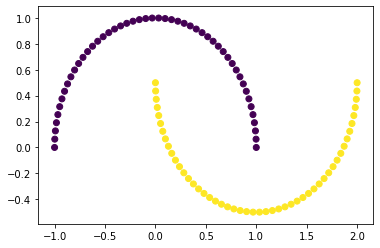

In [8]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [153]:
from keras.models import Sequential
from sklearn.metrics import accuracy_score
import os

In [247]:
from keras.layers import Dense, Activation
from keras.utils import to_categorical
model_simple = Sequential([
    Dense(1, input_shape=(2,)),
    Activation('relu'),
    Dense(2),
    Activation('softmax'),
])



model_complex = Sequential([
    Dense(6, input_shape=(2,)),
    Activation('relu'),
    Dense(4),
    Activation('relu'),
    Dense(3),
    Activation('relu'),
    Dense(2),
    Activation('softmax'),
])

model_complex_2 = Sequential([
    Dense(10, input_shape=(2,)),
    Activation('relu'),
    Dense(8, ),
    Activation('relu'),
    Dense(8),
    Activation('relu'),
    Dense(2),
    Activation('softmax'),
])

In [249]:
model_simple.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_complex.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_complex_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [220]:
def make_plot(X, y, model, dataset, model_type, noise, n_iter=80,cmap='PRGn'):

    h=200
    if dataset=="moon":
        X, y = make_moons(noise=noise)
    if dataset=="iris":
        X, y = load_iris()['data'][:, :2], load_iris()['target']
    print(X.shape, y.shape)
    y_binary = to_categorical(y)

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.2, X[:, 0].max()+0.2, h),
                             np.linspace(X[:, 1].min()-0.2, X[:, 1].max()+0.2, h))
    XX = np.c_[xx.ravel(), yy.ravel()]

    for i in range(n_iter):
        model.fit(X, y_binary, epochs=1, verbose=0)
        Z = np.argmax(model.predict(XX), axis=1).reshape(xx.shape)
        y_hat = np.argmax(model.predict(X), axis=1)
        train_accuracy = accuracy_score(y, y_hat)
        contours = plt.contourf(xx, yy, Z, h , cmap=cmap, alpha=0.4)
        plt.title("Iteration: "+str(i)+"\n Accuracy:"+str(train_accuracy))
        plt.colorbar()
        plt.scatter(X[:, 0], X[:, 1], c= y, cmap=cmap)
        if not os.path.exists(f"/Users/nipun/Desktop/animation-keras/{dataset}/{model_type}/{noise}/"):
            os.makedirs(f"/Users/nipun/Desktop/animation-keras/{dataset}/{model_type}/{noise}/")
        plt.savefig(f"/Users/nipun/Desktop/animation-keras/{dataset}/{model_type}/{noise}/{i:03}.png")
        plt.clf()
    

In [221]:
make_plot(X, y, model_simple, "moon", "simple", None)

(100, 2) (100,)


<Figure size 432x288 with 0 Axes>

In [222]:
!convert -delay 20 -loop 0 /Users/nipun/Desktop/animation-keras/moon/simple/None/*.png moon-simple-none.gif

![](moon-simple-none.gif)

In [223]:
make_plot(X, y, model_complex, "moon", "complex", None, 500)

(100, 2) (100,)


<Figure size 432x288 with 0 Axes>

In [224]:
!convert -delay 20 -loop 0 /Users/nipun/Desktop/animation-keras/moon/complex/None/*.png moon-complex-none.gif

![](moon-complex-none.gif)

In [237]:
make_plot(X, y, model_complex_2, "moon", "complex", 0.3, 700)

(100, 2) (100,)


<Figure size 432x288 with 0 Axes>

In [238]:
!convert -delay 20 -loop 0 /Users/nipun/Desktop/animation-keras/moon/complex/0.3/*.png moon-complex-03.gif

![](moon-complex-03.gif)

In [257]:
model_simple_2 = Sequential([
    Dense(1, input_shape=(2,)),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

model_simple_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [258]:
make_plot(X, y, model_simple_2, "iris", "simple", None, 500)

(150, 2) (150,)


<Figure size 432x288 with 0 Axes>

In [262]:
!convert -delay 20 -loop 0 /Users/nipun/Desktop/animation-keras/iris/simple/None/*.png iris-simple.gif

![](iris-simple.gif)

In [259]:
model_complex_iris = Sequential([
    Dense(12, input_shape=(2,)),
    Activation('relu'),
    Dense(6),
    Activation('relu'),
    Dense(4),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

model_complex_iris.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [260]:
make_plot(X, y, model_complex_iris, "iris", "complex", None, 500)

(150, 2) (150,)


<Figure size 432x288 with 0 Axes>

In [261]:
!convert -delay 20 -loop 0 /Users/nipun/Desktop/animation-keras/iris/complex/None/*.png iris-complex.gif

![](iris-complex.gif)